# Airline Flights Data - EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv(r"airlines_flights_data.csv")

In [3]:
df = pd.DataFrame(data)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 12 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   index             300153 non-null  int64  
 1   airline           300153 non-null  object 
 2   flight            300153 non-null  object 
 3   source_city       300153 non-null  object 
 4   departure_time    300153 non-null  object 
 5   stops             300153 non-null  object 
 6   arrival_time      300153 non-null  object 
 7   destination_city  300153 non-null  object 
 8   class             300153 non-null  object 
 9   duration          300153 non-null  float64
 10  days_left         300153 non-null  int64  
 11  price             300153 non-null  int64  
dtypes: float64(1), int64(3), object(8)
memory usage: 27.5+ MB


In [5]:
df.describe()

,index,duration,days_left,price
count,300153.000000,300153.000000,300153.000000,300153.000000
mean,150076.000000,12.221021,26.004751,20889.660523
std,86646.852011,7.191997,13.561004,22697.767366
min,0.000000,0.830000,1.000000,1105.000000
25%,75038.000000,6.830000,15.000000,4783.000000
50%,150076.000000,11.250000,26.000000,7425.000000
75%,225114.000000,16.170000,38.000000,42521.000000
max,300152.000000,49.830000,49.000000,123071.000000


In [6]:
df.head()

,index,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


In [7]:
#setting index
df.set_index('index')

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
index,,,,,,,,,,,
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...
300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099


In [8]:
df.shape

(300153, 12)

In [9]:
# numerical columns

num_cols = df.select_dtypes(include=['int64','float64'])

In [10]:
num_cols = num_cols[['duration','price']]

In [11]:
num_cols


,duration,price
0,2.17,5953
1,2.33,5953
2,2.17,5956
3,2.25,5955
4,2.33,5955
...,...,...
300148,10.08,69265
300149,10.42,77105
300150,13.83,79099
300151,10.00,81585


In [12]:
num_cols.isna().sum()

duration    0
price       0
dtype: int64

In [13]:
# Identifying missing values

df.isna().sum()

index               0
airline             0
flight              0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
dtype: int64

In [14]:
# Identifying duplicate records

df.duplicated().sum()

0

<Axes: xlabel='price'>

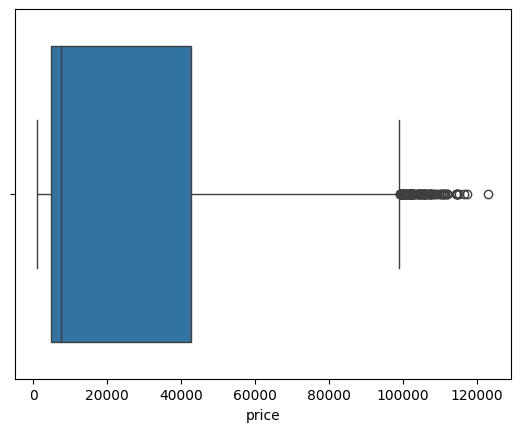

In [15]:
# Outlier Detection

sns.boxplot(x=df['price'])

In [16]:
Q1 = np.percentile(df['price'],25)

Q2 = np.percentile(df['price'],50)

Q3 = np.percentile(df['price'],75)

IQR = Q3 - Q1

upperLimit = Q3 +1.5*(IQR)

lowerLimit = Q1 -1.5*(IQR)

df['price'] = df['price'].apply(lambda x: x if x > lowerLimit and x < upperLimit else np.nan)

<Axes: xlabel='price'>

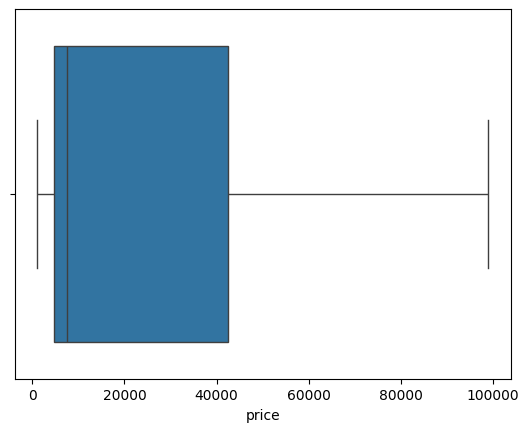

In [17]:
#Outliers removed
sns.boxplot(x=df['price'])

<Axes: xlabel='duration'>

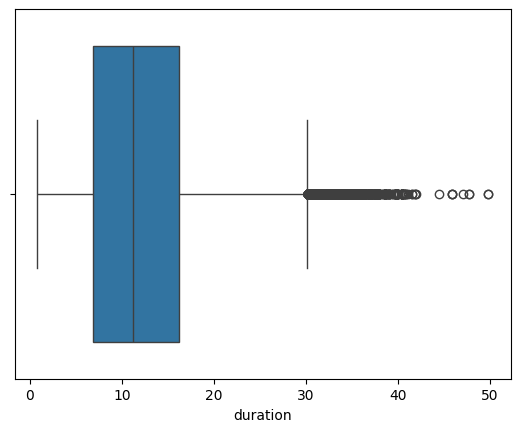

In [18]:
# Duration Outlier Detection

sns.boxplot(x=df['duration'])

In [19]:
#Removing outliers from duration columns

Q1 = np.percentile(df['duration'],25)

Q2 = np.percentile(df['duration'],50)

Q3 = np.percentile(df['duration'],75)

IQR = Q3 - Q1

upperLimit = Q3 +1.5*(IQR)

lowerLimit = Q1 -1.5*(IQR)

df['duration'] = df['duration'].apply(lambda x: x if x > lowerLimit and x < upperLimit else np.nan)

<Axes: xlabel='price'>

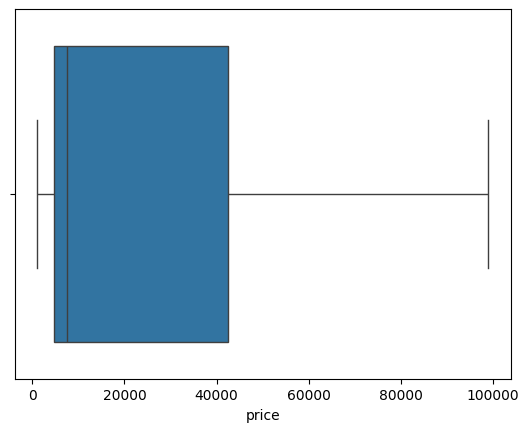

In [20]:
#Outliers removed
sns.boxplot(x=df['price'])

Q1. No. of flights operating in each airline

In [21]:
df['airline'].unique()

array(['SpiceJet', 'AirAsia', 'Vistara', 'GO_FIRST', 'Indigo',
       'Air_India'], dtype=object)

In [22]:
x=df['airline'].value_counts().sort_values(ascending=False)

<Axes: xlabel='airline', ylabel='count'>

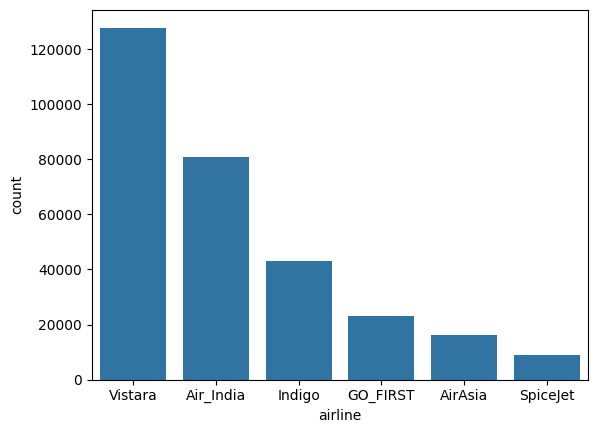

In [23]:
sns.barplot(data=x)

Q2. What is the mean price of a flight

In [24]:
df.loc[:,'price'].median()

7425.0

Q3 Show flights with zero stops

In [25]:
df['stops'].unique()

array(['zero', 'one', 'two_or_more'], dtype=object)

In [26]:
z_stops = df[df['stops'] == 'zero'][['flight','stops']].count()
t_stops = df[df['stops'] == 'one'][['flight','stops']].count()
o_stops = df[df['stops'] == 'two_or_more'][['flight','stops']].count()

Q4. Show no of flights wrt stops

<Axes: xlabel='stops'>

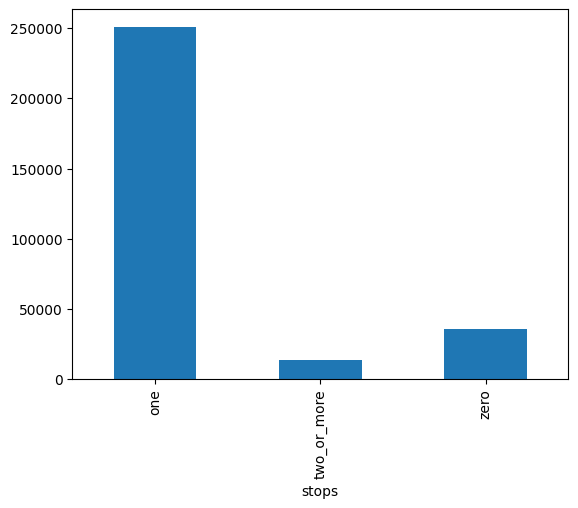

In [27]:
df['stops'].value_counts().sort_index().plot(kind='bar')

Q5. Avg flight price according to airlines

In [28]:
df.groupby('airline')['price'].median()

airline
AirAsia       3276.0
Air_India    11520.0
GO_FIRST      5336.0
Indigo        4453.0
SpiceJet      5654.0
Vistara      15512.0
Name: price, dtype: float64

Q6. Airline wise flight class distribution

In [29]:
df.groupby(['airline','class']).agg({'price':'median'})

price
airline   class            
AirAsia   Economy    3276.0
Air_India Business  49613.0
          Economy    6082.0
GO_FIRST  Economy    5336.0
Indigo    Economy    4453.0
SpiceJet  Economy    5654.0
Vistara   Business  56588.0
          Economy    6461.0

Q7. Price Elasticity by Stops

In [30]:
abc = df.groupby('stops')['price'].mean()

<Axes: ylabel='stops'>

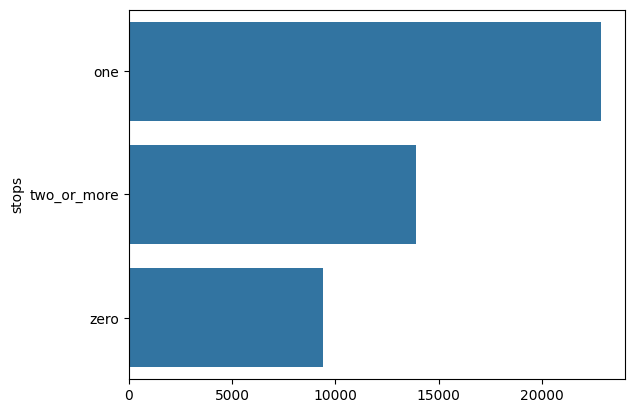

In [31]:
sns.barplot(x=abc.values,y=abc.index,orient='h')

Q8. High-Demand City Pairs

In [32]:
df['route'] = df['source_city'] + " -> " + df['destination_city']

In [33]:
df.groupby(['route'])['price'].mean().sort_values(ascending=False).head(10)

route
Chennai -> Bangalore    25056.425974
Kolkata -> Chennai      23660.361040
Bangalore -> Kolkata    23491.916426
Bangalore -> Chennai    23321.850078
Bangalore -> Mumbai     23104.470584
Mumbai -> Bangalore     23035.396596
Mumbai -> Chennai       22739.893926
Kolkata -> Bangalore    22694.805154
Chennai -> Mumbai       22633.566663
Chennai -> Kolkata      22623.859292
Name: price, dtype: float64

Q9. Flight Density by Route

In [34]:
df['route'].value_counts().head(10)

route
Delhi -> Mumbai        15289
Mumbai -> Delhi        14809
Delhi -> Bangalore     14012
Bangalore -> Delhi     13756
Bangalore -> Mumbai    12939
Mumbai -> Bangalore    12885
Mumbai -> Kolkata      12602
Delhi -> Kolkata       11934
Kolkata -> Mumbai      11467
Delhi -> Chennai       10780
Name: count, dtype: int64

Q10. Revenue Contribution by Airline

In [35]:
total_revenue = df['price'].sum()
airline_revenue_share = df.groupby('airline')['price'].sum()/total_revenue * 100

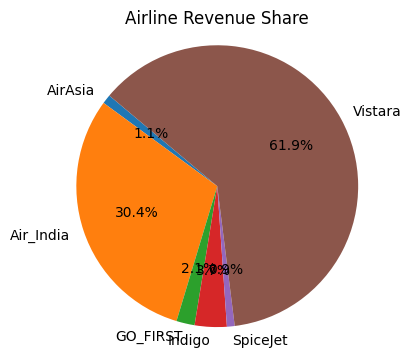

In [36]:
plt.figure(figsize=(4, 4))
plt.pie(airline_revenue_share.values, 
        labels=airline_revenue_share.index, 
        autopct='%1.1f%%', 
        startangle=140)
plt.title("Airline Revenue Share")
plt.axis('equal')  # Makes the pie circular
plt.show()

📊 Conclusion & Key Insights

After conducting a thorough Exploratory Data Analysis (EDA) on the airline flights dataset, here are the key business insights and findings:

✈️ Airline Operations:

[Q1] The dataset includes multiple airlines, with a few dominating in terms of flight count. These dominant carriers might hold significant market share.

[Q10] Airlines such as IndiGo and Air India contribute a large share of total revenue, indicating strong pricing or demand.

💸 Pricing Insights:

[Q2] The median flight price gives a central view of ticket costs, unaffected by extreme values.

[Q5] Flight prices vary significantly by airline, hinting at brand positioning or service class differences.

[Q7] Prices tend to increase with the number of stops, confirming expected cost increments with stopovers.

🛑 Stop and Route Analysis:

[Q3 & Q4] Most flights have zero or one stop, aligning with typical short/medium-haul operations.

[Q8 & Q9] High-demand city pairs (routes) like Delhi -> Mumbai or Bangalore -> Hyderabad dominate the network, suggesting key business or travel corridors.

🧼 Data Cleaning & Outliers:

Outliers were removed using the Interquartile Range (IQR) method for both price and duration, improving the reliability of visualizations and statistics.

Missing values created due to outlier removal should be handled or imputed for further modeling or aggregation tasks.

📈 Visual Summary:

The use of bar plots, boxplots, and a pie chart helped in clearly conveying categorical distributions, numerical spread, and revenue shares.

Clear visual differentiation across categories like airline, stops, and class helped derive actionable insights.S